# Comparision of Models:

### 1. Logistic Regression
### 2. DNN
### 3. CNN
### 4. CNN + Pooling
### 5. CNN + Pooling + Dropout
### 6. CNN + Pooling + Dropout + Normalization
### 7. DNN + Pooling + Dropout + Normalization + Normalization

In [16]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
# Load/Prep the Data
(x_train, y_train_num), (x_test, y_test_num) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [18]:
x_train /= 255
x_test /= 255

In [19]:
y_train = np_utils.to_categorical(y_train_num, 10)
y_test = np_utils.to_categorical(y_test_num, 10)

In [20]:
print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
x_train_ml = x_train.reshape(x_train.shape[0], 28*28).astype('float32')
logReg = LogisticRegression()
logReg.fit(x_train_ml, y_train_num)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
x_test_ml = x_test.reshape(x_test.shape[0], 28*28).astype('float32')
predictions = logReg.predict(x_test_ml)
score = logReg.score(x_test_ml, y_test_num)
print(score)

0.9256


#DNN

In [24]:
BATCH_SIZE = 32
EPOCHS = 10

In [29]:
# Define the Type of Model
model1 = Sequential()

# Flatten Imgaes to Vector
model1.add(Reshape((784,), input_shape=(28, 28, 1)))

# Layer 1
model1.add(Dense(128))
model1.add(Activation("relu"))

# Layer 2
model1.add(Dense(10))
model1.add(Activation("softmax"))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

# Train the model
model1.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.30, callbacks=callback_list, verbose=True)
#model1.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
#          validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

# Save model and training
model1.save('./dnn.h5')

Epoch 1/10
1312/1313 [============================>.] - ETA: 0s - loss: 0.3064 - accuracy: 0.9120

1313/1313 [==============================] - 4s 3ms/step - loss: 0.3063 - accuracy: 0.9120 - val_loss: 0.1836 - val_accuracy: 0.9457
Epoch 2/10
1308/1313 [============================>.] - ETA: 0s - loss: 0.1373 - accuracy: 0.9598

1313/1313 [==============================] - 3s 3ms/step - loss: 0.1373 - accuracy: 0.9598 - val_loss: 0.1391 - val_accuracy: 0.9583
Epoch 3/10
1294/1313 [============================>.] - ETA: 0s - loss: 0.0943 - accuracy: 0.9716

1313/1313 [==============================] - 5s 4ms/step - loss: 0.0944 - accuracy: 0.9716 - val_loss: 0.1138 - val_accuracy: 0.9657
Epoch 4/10
1304/1313 [============================>.] - ETA: 0s - loss: 0.0694 - accuracy: 0.9791

1313/1313 [==============================] - 3s 3ms/step - loss: 0.0693 - accuracy: 0.9791 - val_loss: 0.1066 - val_accuracy: 0.9682
Epoch 5/10
1299/1313 [============================>.] - ETA: 0s - loss: 0.0535 - accuracy: 0.9839

1313/1313 [==============================] - 3s 2ms/step - loss: 0.0533 - accuracy: 0.9839 - val_loss: 0.1060 - val_accuracy: 0.9704
Epoch 6/10
1301/1313 [============================>.] - ETA: 0s - loss: 0.0413 - accuracy: 0.9877

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0413 - accuracy: 0.9876 - val_loss: 0.0990 - val_accuracy: 0.9714
Epoch 7/10
1301/1313 [============================>.] - ETA: 0s - loss: 0.0327 - accuracy: 0.9904

1313/1313 [==============================] - 4s 3ms/step - loss: 0.0326 - accuracy: 0.9905 - val_loss: 0.1038 - val_accuracy: 0.9712
Epoch 8/10
1303/1313 [============================>.] - ETA: 0s - loss: 0.0266 - accuracy: 0.9922

1313/1313 [==============================] - 3s 3ms/step - loss: 0.0266 - accuracy: 0.9922 - val_loss: 0.1122 - val_accuracy: 0.9697
Epoch 9/10
1289/1313 [============================>.] - ETA: 0s - loss: 0.0194 - accuracy: 0.9947

1313/1313 [==============================] - 3s 3ms/step - loss: 0.0197 - accuracy: 0.9946 - val_loss: 0.1055 - val_accuracy: 0.9703
Epoch 10/10
1297/1313 [============================>.] - ETA: 0s - loss: 0.0163 - accuracy: 0.9953

1313/1313 [==============================] - 5s 4ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.1070 - val_accuracy: 0.9726


In [30]:
loss_and_metrics = model1.evaluate(x_test, y_test)
print(loss_and_metrics)

313/313 [==============================] - 0s 1ms/step - loss: 0.0839 - accuracy: 0.9772
[0.08392927050590515, 0.9771999716758728]


In [31]:
model1.predict(x_test[0:1])

1/1 [==============================] - 0s 93ms/step


array([[8.5958099e-08, 1.0888169e-08, 6.6740665e-07, 1.4650854e-03,
        2.9696178e-12, 2.2297342e-09, 4.1431253e-16, 9.9850899e-01,
        1.1599896e-06, 2.4022629e-05]], dtype=float32)

# CNN

In [32]:
BATCH_SIZE = 32
EPOCHS = 10

In [34]:
# Define model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))

# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=10, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
          validation_data=(x_test, y_test), callbacks=callback_list)

# Save model2 and Stats
model2.save('./basic_cnn.h5')

Epoch 1/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.2607 - accuracy: 0.9228

1875/1875 [==============================] - 9s 3ms/step - loss: 0.2599 - accuracy: 0.9230 - val_loss: 0.1104 - val_accuracy: 0.9657
Epoch 2/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.1012 - accuracy: 0.9692

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1012 - accuracy: 0.9692 - val_loss: 0.0888 - val_accuracy: 0.9738
Epoch 3/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.0714 - accuracy: 0.9777

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0715 - accuracy: 0.9777 - val_loss: 0.0703 - val_accuracy: 0.9778
Epoch 4/10
1866/1875 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9827

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0545 - accuracy: 0.9826 - val_loss: 0.0723 - val_accuracy: 0.9764
Epoch 5/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0459 - accuracy: 0.9856

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0620 - val_accuracy: 0.9794
Epoch 6/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0372 - accuracy: 0.9878

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0371 - accuracy: 0.9878 - val_loss: 0.0570 - val_accuracy: 0.9821
Epoch 7/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9893

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0315 - accuracy: 0.9893 - val_loss: 0.0575 - val_accuracy: 0.9828
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9917

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0611 - val_accuracy: 0.9832
Epoch 9/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9927

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0222 - accuracy: 0.9926 - val_loss: 0.0630 - val_accuracy: 0.9822
Epoch 10/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0199 - accuracy: 0.9930

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.0769 - val_accuracy: 0.9797


In [36]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

313/313 [==============================] - 0s 2ms/step - loss: 0.0769 - accuracy: 0.9797
[0.07689682394266129, 0.9797000288963318]


In [35]:
model2.predict(x_test[0:1])

1/1 [==============================] - 0s 48ms/step


array([[3.72459919e-12, 1.67637271e-09, 1.11206768e-08, 8.27835811e-06,
        5.32717100e-11, 5.64184940e-12, 1.00425536e-16, 9.99989629e-01,
        7.28113347e-10, 2.16620697e-06]], dtype=float32)

# CNN with Pooling and Dropout

In [37]:
BATCH_SIZE = 32
EPOCHS = 10

In [38]:
# Define Model
model3 = Sequential()

# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model3.add(Dropout(0.25))

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))

# More Dropout
model3.add(Dropout(0.5))

# Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model3.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
          validation_data=(x_test, y_test), callbacks=callback_list)

# Save model and Stats
model3.save('./cnnPoolingDropOut_1.h5')

Epoch 1/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.9115 - accuracy: 0.7083

1875/1875 [==============================] - 7s 3ms/step - loss: 0.9095 - accuracy: 0.7091 - val_loss: 0.4049 - val_accuracy: 0.8786
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.5973 - accuracy: 0.8156

1875/1875 [==============================] - 7s 4ms/step - loss: 0.5974 - accuracy: 0.8156 - val_loss: 0.3334 - val_accuracy: 0.8990
Epoch 3/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.5255 - accuracy: 0.8400

1875/1875 [==============================] - 6s 3ms/step - loss: 0.5255 - accuracy: 0.8400 - val_loss: 0.2859 - val_accuracy: 0.9158
Epoch 4/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.4833 - accuracy: 0.8532

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4835 - accuracy: 0.8533 - val_loss: 0.2786 - val_accuracy: 0.9145
Epoch 5/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.4553 - accuracy: 0.8609

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4557 - accuracy: 0.8607 - val_loss: 0.2522 - val_accuracy: 0.9227
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.4347 - accuracy: 0.8668

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4344 - accuracy: 0.8668 - val_loss: 0.2457 - val_accuracy: 0.9244
Epoch 7/10
1863/1875 [============================>.] - ETA: 0s - loss: 0.4189 - accuracy: 0.8714

1875/1875 [==============================] - 6s 3ms/step - loss: 0.4190 - accuracy: 0.8715 - val_loss: 0.2366 - val_accuracy: 0.9294
Epoch 8/10
1860/1875 [============================>.] - ETA: 0s - loss: 0.4042 - accuracy: 0.8775

1875/1875 [==============================] - 7s 4ms/step - loss: 0.4040 - accuracy: 0.8775 - val_loss: 0.2295 - val_accuracy: 0.9307
Epoch 9/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.3974 - accuracy: 0.8803

1875/1875 [==============================] - 6s 3ms/step - loss: 0.3969 - accuracy: 0.8804 - val_loss: 0.2231 - val_accuracy: 0.9308
Epoch 10/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.3866 - accuracy: 0.8831

1875/1875 [==============================] - 7s 4ms/step - loss: 0.3868 - accuracy: 0.8831 - val_loss: 0.2145 - val_accuracy: 0.9343


In [39]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)

313/313 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.9343
[0.21448014676570892, 0.9343000054359436]


In [40]:
model3.predict(x_test[0:1])

1/1 [==============================] - 0s 51ms/step


array([[8.2021761e-06, 6.0083935e-06, 2.0698016e-03, 6.9627400e-05,
        1.5753870e-06, 3.4065504e-06, 8.1170572e-09, 9.9781942e-01,
        6.9556046e-07, 2.1346263e-05]], dtype=float32)

# Data Augmentation

In [41]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

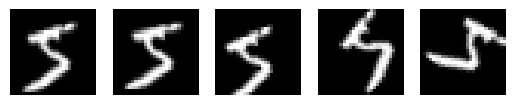

In [42]:
gen = datagen.flow(x_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()

In [47]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model3.fit_generator(datagen.flow(x_train, y_train,
                    batch_size=BATCH_SIZE),
                    epochs=EPOCHS, callbacks=callback_list)
model3.save('./cnn_augment.h5')

Epoch 1/10


<ipython-input-47-f111248505f8>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model3.fit_generator(datagen.flow(x_train, y_train,


1871/1875 [============================>.] - ETA: 0s - loss: 1.5150 - accuracy: 0.4948

1875/1875 [==============================] - 22s 11ms/step - loss: 1.5148 - accuracy: 0.4950
Epoch 2/10
1871/1875 [============================>.] - ETA: 0s - loss: 1.3518 - accuracy: 0.5455

1875/1875 [==============================] - 20s 11ms/step - loss: 1.3520 - accuracy: 0.5453
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 1.2997 - accuracy: 0.5625

1875/1875 [==============================] - 19s 10ms/step - loss: 1.2997 - accuracy: 0.5625
Epoch 4/10
1872/1875 [============================>.] - ETA: 0s - loss: 1.2542 - accuracy: 0.5747

1875/1875 [==============================] - 20s 11ms/step - loss: 1.2539 - accuracy: 0.5748
Epoch 5/10
1872/1875 [============================>.] - ETA: 0s - loss: 1.2265 - accuracy: 0.5861

1875/1875 [==============================] - 20s 11ms/step - loss: 1.2268 - accuracy: 0.5860
Epoch 6/10
1872/1875 [============================>.] - ETA: 0s - loss: 1.2071 - accuracy: 0.5951

1875/1875 [==============================] - 19s 10ms/step - loss: 1.2067 - accuracy: 0.5952
Epoch 7/10
1871/1875 [============================>.] - ETA: 0s - loss: 1.1800 - accuracy: 0.6003

1875/1875 [==============================] - 20s 11ms/step - loss: 1.1798 - accuracy: 0.6005
Epoch 8/10
1874/1875 [============================>.] - ETA: 0s - loss: 1.1718 - accuracy: 0.6073

1875/1875 [==============================] - 19s 10ms/step - loss: 1.1717 - accuracy: 0.6073
Epoch 9/10
1874/1875 [============================>.] - ETA: 0s - loss: 1.1578 - accuracy: 0.6091

1875/1875 [==============================] - 20s 11ms/step - loss: 1.1579 - accuracy: 0.6091
Epoch 10/10
1870/1875 [============================>.] - ETA: 0s - loss: 1.1456 - accuracy: 0.6139

1875/1875 [==============================] - 19s 10ms/step - loss: 1.1454 - accuracy: 0.6139


In [ ]:
loss_and_metrics = model3.evaluate(x_test, y_test)
print(loss_and_metrics)